In [2]:
import pandas as pd

In [3]:
# dfs = list()
# files = []
# for sizes in ['0.5', '0.75', '0.9']:
#     for iters in ['0', '1', '2', '3']:
#         file = f'HyperParameterSearch_test_train_size{sizes}_params_{iters}.csv'
#         df_tmp = pd.read_csv('/work/home/jchealy/HighDimensionalClustering/' + file)
#         df_tmp['file'] = file
#         dfs.append(df_tmp)
#         files.append(file)
# df = pd.concat(dfs)

In [5]:
df = pd.read_csv('ParameterResults/HyperParameterSearch_September11_mark2.csv')

In [5]:
df.shape

(12960, 13)

In [6]:
df.columns

Index(['k', 'min_prob', 'model_prior_strength', 'n_iter', 'n_neighbors',
       'min_cluster_size', 'iteration', 'train_size', 'duration', 'adj_rand',
       'adj_rand_no_noise', 'number_of_clusters', 'proportion_of_noise'],
      dtype='object')

In [7]:
df

,k,min_prob,model_prior_strength,n_iter,n_neighbors,min_cluster_size,iteration,train_size,duration,adj_rand,adj_rand_no_noise,number_of_clusters,proportion_of_noise
0,1,1.000000e-16,0.0,2,5,600,0,0.9,122.089076,0.706516,0.803320,13,0.089921
1,1,1.000000e-16,0.0,2,5,600,1,0.9,2.477962,0.861214,0.893067,11,0.030413
2,1,1.000000e-16,0.0,2,5,600,2,0.9,3.085262,0.636835,0.722426,13,0.091508
3,1,1.000000e-16,0.0,2,5,600,3,0.9,3.155429,0.788072,0.870160,12,0.070063
4,1,1.000000e-16,0.0,2,5,600,4,0.9,2.996823,0.808109,0.868713,11,0.058492
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,2,1.000000e-02,0.5,5,50,1500,0,0.5,6.131552,0.359173,0.612485,6,0.363457
12956,2,1.000000e-02,0.5,5,50,1500,1,0.5,4.230811,0.358862,0.614588,6,0.363914
12957,2,1.000000e-02,0.5,5,50,1500,2,0.5,4.281286,0.350379,0.616920,6,0.371400
12958,2,1.000000e-02,0.5,5,50,1500,3,0.5,4.112571,0.358495,0.612315,6,0.363914


In [8]:
set(df.min_cluster_size)

{600, 800, 1000, 1500}

In [9]:
# Why are we getting a max rand value of 84% ? It was much larger than that in the original notebook...
df.sort_values('adj_rand', ascending=False)

,k,min_prob,model_prior_strength,n_iter,n_neighbors,min_cluster_size,iteration,train_size,duration,adj_rand,adj_rand_no_noise,number_of_clusters,proportion_of_noise
2886,2,1.000000e-08,0.1,2,15,1000,1,0.9,3.881293,0.905552,0.909248,11,0.003651
2301,1,1.000000e-08,0.0,2,15,1000,1,0.9,3.522086,0.905550,0.909343,11,0.003714
1806,2,1.000000e-08,0.1,2,15,800,1,0.9,3.714520,0.905395,0.908978,11,0.003540
3021,2,1.000000e-04,0.1,2,15,1000,1,0.9,3.405255,0.905167,0.914637,11,0.009032
1671,2,1.000000e-16,0.1,2,15,800,1,0.9,3.556611,0.904737,0.907570,11,0.002825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12544,2,1.000000e-16,0.5,5,5,1500,4,0.5,1.289222,0.095265,0.056957,3,0.103143
12258,1,1.000000e-04,0.5,3,5,1500,3,0.5,1.131474,0.070847,0.052573,3,0.110486
11974,1,1.000000e-16,0.5,2,5,1500,4,0.5,1.237407,0.065893,0.052119,3,0.080086
12378,1,1.000000e-02,0.5,2,5,1500,3,0.5,1.441382,0.063992,0.052815,3,0.168000


In [10]:
parameters = df.columns[0:8]
parameters

Index(['k', 'min_prob', 'model_prior_strength', 'n_iter', 'n_neighbors',
       'min_cluster_size', 'iteration', 'train_size'],
      dtype='object')

In [11]:
ncol=3
nrow=3
figsize = (10,10)

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df['score_bin'] = pd.cut(
            df["adj_rand"], bins=np.linspace(0.0, 1.0, 10)
        )


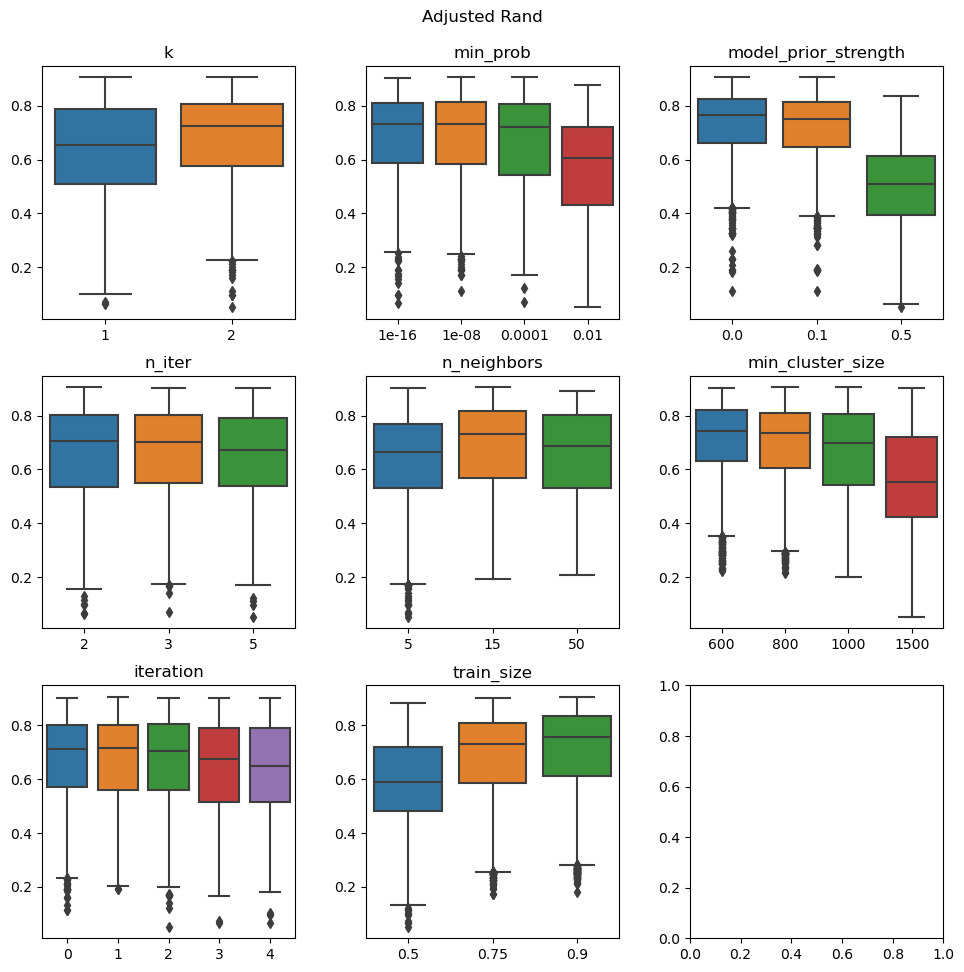

In [13]:
fig, axs = plt.subplots(ncol,nrow, figsize=figsize)
fig.suptitle('Adjusted Rand')
fig.tight_layout(pad=2.0)

for i, var in enumerate(parameters):
    # print(var)
    # print(i//nrow, i%nrow)
    ax = axs[i//nrow, i%nrow]
    sns.boxplot(df, x=var, y='adj_rand', ax=ax)
    ax.set(title=var, xlabel='', ylabel='')

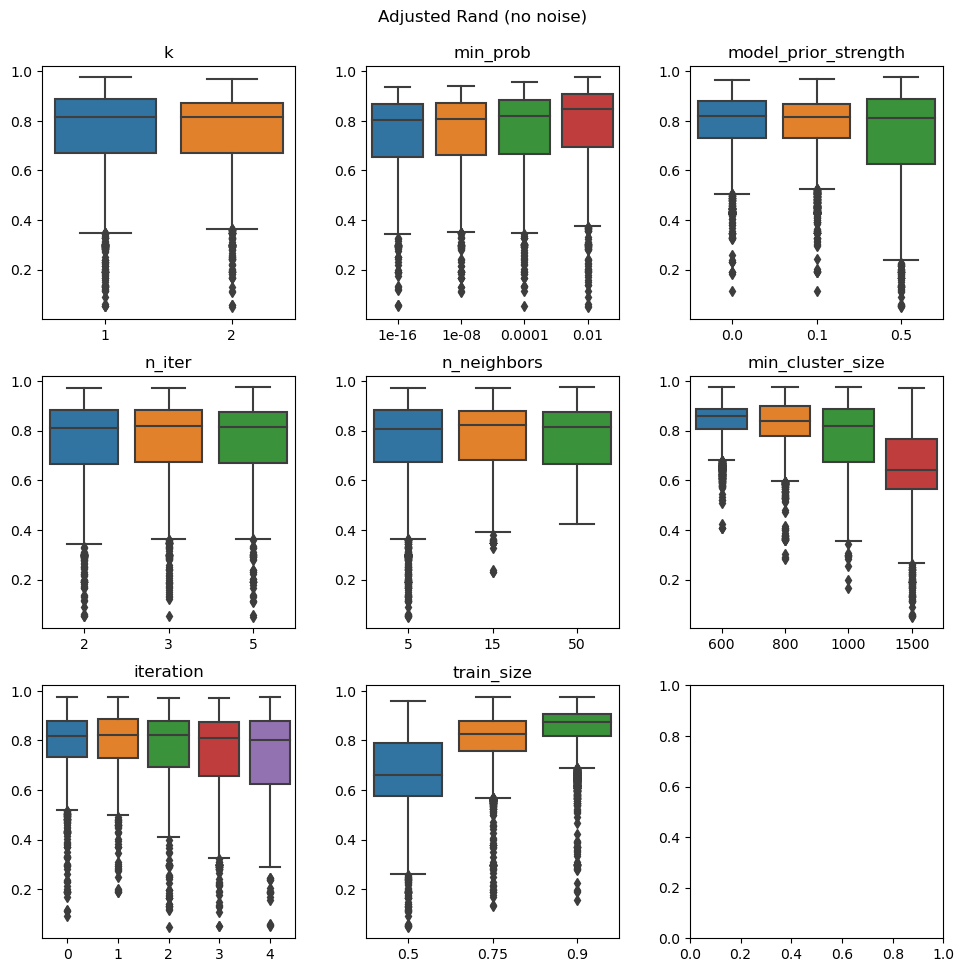

In [14]:
fig, axs = plt.subplots(ncol,nrow, figsize=figsize)
fig.suptitle('Adjusted Rand (no noise)')
fig.tight_layout(pad=2.0)

for i, var in enumerate(parameters):
    # print(var)
    # print(i//nrow, i%nrow)
    ax = axs[i//nrow, i%nrow]
    sns.boxplot(df, x=var, y='adj_rand_no_noise', ax=ax)
    ax.set(title=var, xlabel='', ylabel='')

## 

In [15]:
df[(df.min_cluster_size==800)
            &(df.n_neighbors==15)
            &(df.n_iter==3)
            &(df.model_prior_strength==0.1)
            &(df.min_prob==0.01)
            &(df.k==1)]

,k,min_prob,model_prior_strength,n_iter,n_neighbors,min_cluster_size,iteration,train_size,duration,adj_rand,adj_rand_no_noise,number_of_clusters,proportion_of_noise,score_bin
1550,1,0.01,0.1,3,15,800,0,0.90,130.728804,0.733871,0.954659,11,0.138413,"(0.667, 0.778]"
1551,1,0.01,0.1,3,15,800,1,0.90,4.346856,0.734366,0.952811,11,0.137460,"(0.667, 0.778]"
1552,1,0.01,0.1,3,15,800,2,0.90,4.429763,0.731174,0.949886,11,0.137937,"(0.667, 0.778]"
1553,1,0.01,0.1,3,15,800,3,0.90,3.880621,0.726165,0.947865,11,0.139841,"(0.667, 0.778]"
1554,1,0.01,0.1,3,15,800,4,0.90,4.550646,0.689709,0.870934,10,0.133984,"(0.667, 0.778]"
5870,1,0.01,0.1,3,15,800,0,0.75,2.728449,0.694304,0.872754,10,0.132038,"(0.667, 0.778]"
5871,1,0.01,0.1,3,15,800,1,0.75,3.034390,0.684211,0.857480,10,0.131162,"(0.667, 0.778]"
5872,1,0.01,0.1,3,15,800,2,0.75,3.559374,0.689804,0.869747,10,0.133124,"(0.667, 0.778]"
5873,1,0.01,0.1,3,15,800,3,0.75,3.529675,0.726352,0.934162,11,0.134229,"(0.667, 0.778]"
5874,1,0.01,0.1,3,15,800,4,0.75,3.532153,0.690091,0.893215,12,0.133886,"(0.667, 0.778]"


In [16]:
param_no_iteration = list(parameters)
param_no_iteration.remove('iteration')

In [17]:
df_result_span = df.groupby(param_no_iteration).adj_rand_no_noise.agg(('mean', 'max', 'min', 'var')).reset_index()

In [18]:
df_result_span[(df_result_span.n_neighbors==50) & (df_result_span.train_size==.9) & (df_result_span.min_cluster_size==800)]

,k,min_prob,model_prior_strength,n_iter,n_neighbors,min_cluster_size,train_size,mean,max,min,var
29,1,1.000000e-16,0.0,2,50,800,0.9,0.889953,0.895221,0.883684,0.000024
65,1,1.000000e-16,0.0,3,50,800,0.9,0.893953,0.899672,0.888602,0.000027
101,1,1.000000e-16,0.0,5,50,800,0.9,0.897649,0.901598,0.891655,0.000014
137,1,1.000000e-16,0.1,2,50,800,0.9,0.888050,0.896912,0.866741,0.000152
173,1,1.000000e-16,0.1,3,50,800,0.9,0.899502,0.902316,0.896595,0.000007
...,...,...,...,...,...,...,...,...,...,...,...
2441,2,1.000000e-02,0.1,3,50,800,0.9,0.943381,0.947887,0.939229,0.000011
2477,2,1.000000e-02,0.1,5,50,800,0.9,0.934039,0.952223,0.873341,0.001164
2513,2,1.000000e-02,0.5,2,50,800,0.9,0.810232,0.902965,0.572740,0.018810
2549,2,1.000000e-02,0.5,3,50,800,0.9,0.825609,0.883195,0.609778,0.014566


In [19]:
df_all = df_result_span.merge(df)

In [20]:
df_all.sort_values('var', ascending=False)

,k,min_prob,model_prior_strength,n_iter,n_neighbors,min_cluster_size,train_size,mean,max,min,var,iteration,duration,adj_rand,adj_rand_no_noise,number_of_clusters,proportion_of_noise,score_bin
6177,1,0.01,0.5,3,5,1500,0.9,0.743577,0.967645,0.157172,0.115894,2,2.059433,0.414972,0.903199,8,0.384746,"(0.333, 0.444]"
6179,1,0.01,0.5,3,5,1500,0.9,0.743577,0.967645,0.157172,0.115894,4,2.072771,0.182268,0.157172,4,0.270524,"(0.111, 0.222]"
6175,1,0.01,0.5,3,5,1500,0.9,0.743577,0.967645,0.157172,0.115894,0,2.096542,0.438961,0.953272,8,0.392794,"(0.333, 0.444]"
6176,1,0.01,0.5,3,5,1500,0.9,0.743577,0.967645,0.157172,0.115894,1,2.126891,0.340636,0.736599,6,0.458111,"(0.333, 0.444]"
6178,1,0.01,0.5,3,5,1500,0.9,0.743577,0.967645,0.157172,0.115894,3,2.022346,0.209086,0.967645,5,0.631968,"(0.111, 0.222]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5562,1,0.01,0.1,2,50,1000,0.9,0.953879,0.955355,0.952550,0.000001,2,8.027379,0.737267,0.952550,11,0.135571,"(0.667, 0.778]"
5563,1,0.01,0.1,2,50,1000,0.9,0.953879,0.955355,0.952550,0.000001,3,8.468590,0.736188,0.952947,11,0.136206,"(0.667, 0.778]"
5561,1,0.01,0.1,2,50,1000,0.9,0.953879,0.955355,0.952550,0.000001,1,8.740175,0.739491,0.953884,11,0.134857,"(0.667, 0.778]"
5560,1,0.01,0.1,2,50,1000,0.9,0.953879,0.955355,0.952550,0.000001,0,8.642905,0.737638,0.955355,11,0.136397,"(0.667, 0.778]"


In [21]:
np.array(df[parameters])

array([[1.0e+00, 1.0e-16, 0.0e+00, ..., 6.0e+02, 0.0e+00, 9.0e-01],
       [1.0e+00, 1.0e-16, 0.0e+00, ..., 6.0e+02, 1.0e+00, 9.0e-01],
       [1.0e+00, 1.0e-16, 0.0e+00, ..., 6.0e+02, 2.0e+00, 9.0e-01],
       ...,
       [2.0e+00, 1.0e-02, 5.0e-01, ..., 1.5e+03, 2.0e+00, 5.0e-01],
       [2.0e+00, 1.0e-02, 5.0e-01, ..., 1.5e+03, 3.0e+00, 5.0e-01],
       [2.0e+00, 1.0e-02, 5.0e-01, ..., 1.5e+03, 4.0e+00, 5.0e-01]])

In [22]:
parameters

Index(['k', 'min_prob', 'model_prior_strength', 'n_iter', 'n_neighbors',
       'min_cluster_size', 'iteration', 'train_size'],
      dtype='object')

In [24]:
from sklearn.linear_model import LinearRegression
X = np.array(df_result_span[param_no_iteration])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.array(df_result_span['var'])
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.2717581597758496

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [54]:
param_no_iteration[np.argmax(rf.feature_importances_)]

'min_cluster_size'

[Text(0.5, 1.0, 'Distribution of Ajusted Rand (no noise)')]

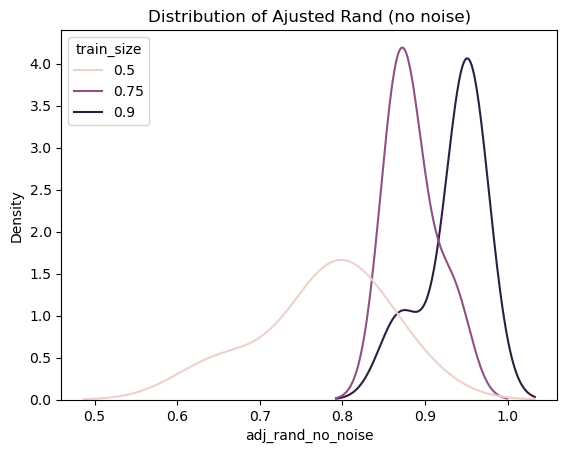

In [28]:
sns.kdeplot(df[(df.min_cluster_size==800)
            &(df.n_neighbors==15)
            &(df.n_iter==3)
            &(df.model_prior_strength==0.1)
            &(df.min_prob==0.01)
            &(df.k==1)], x='adj_rand_no_noise', hue='train_size').set(title='Distribution of Ajusted Rand (no noise)')

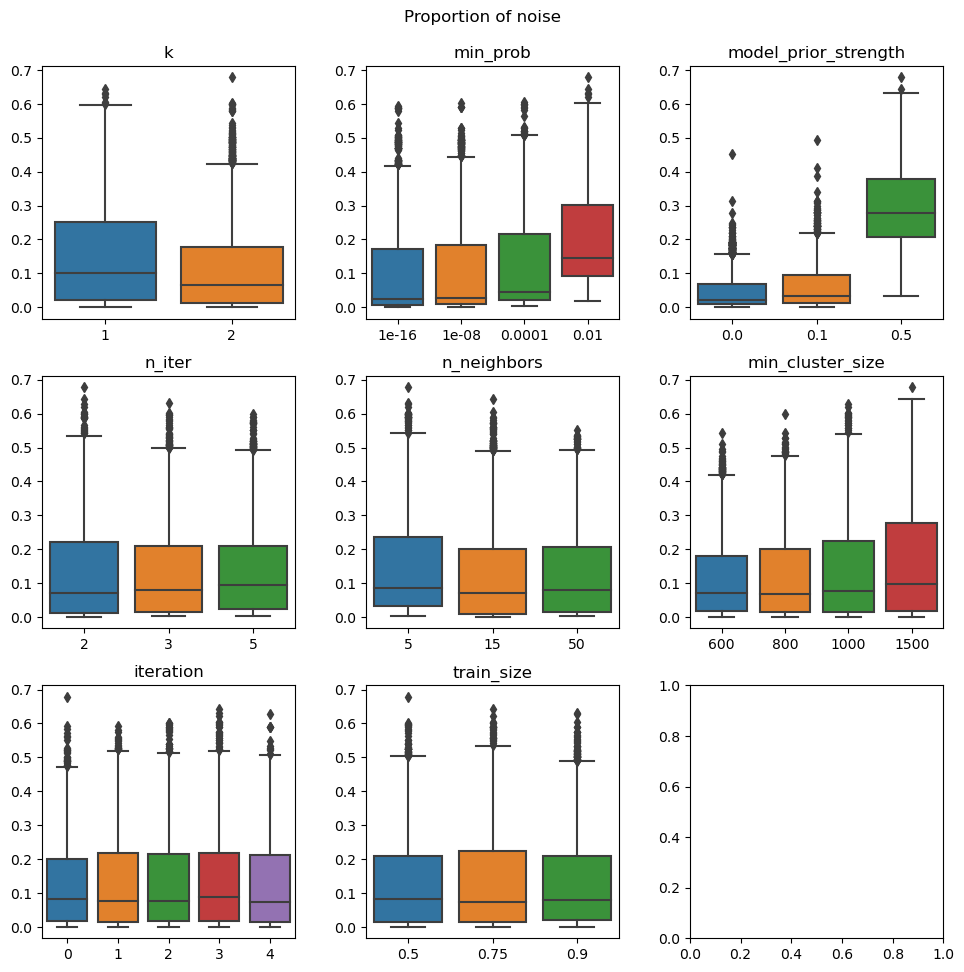

In [29]:
fig, axs = plt.subplots(ncol,nrow, figsize=figsize)
fig.suptitle('Proportion of noise')
fig.tight_layout(pad=2.0)

for i, var in enumerate(parameters):
    # print(var)
    # print(i//nrow, i%nrow)
    ax = axs[i//nrow, i%nrow]
    sns.boxplot(df, x=var, y='proportion_of_noise', ax=ax)
    ax.set(title=var, xlabel='', ylabel='')

## Remove iteration 0 from this plot

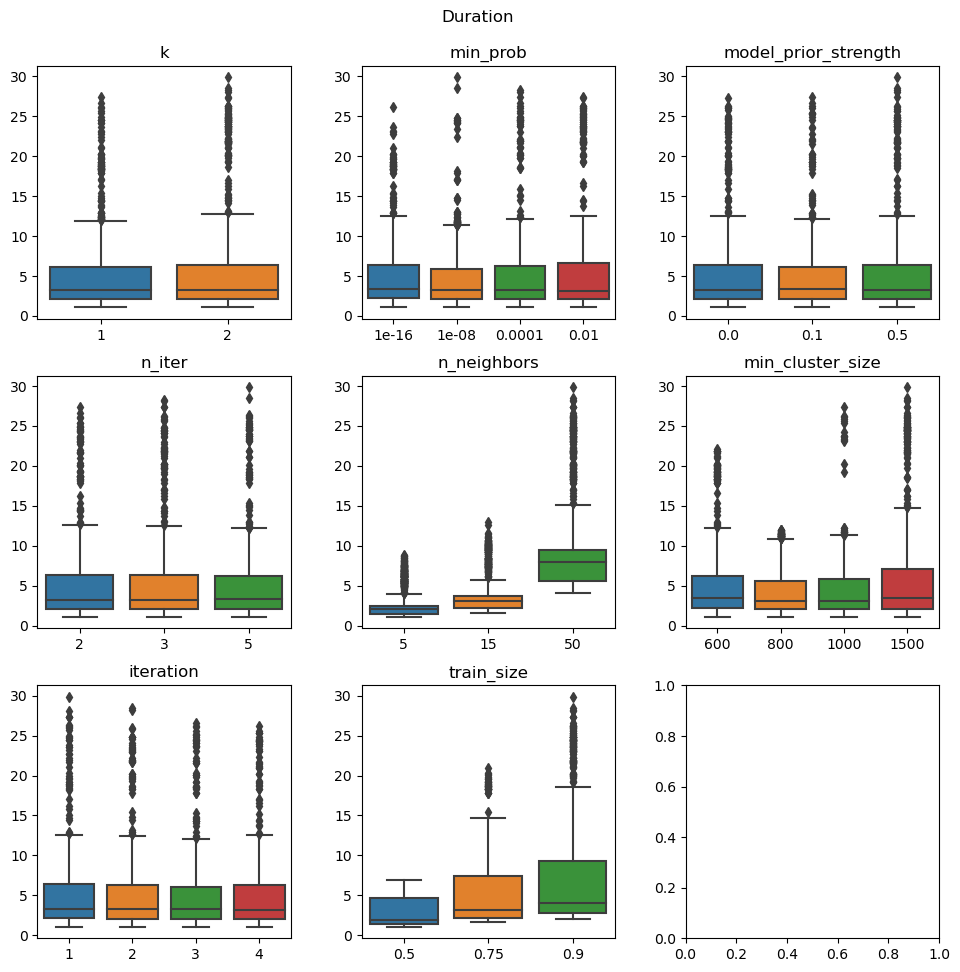

In [30]:
fig, axs = plt.subplots(ncol,nrow, figsize=figsize)
fig.suptitle('Duration')
fig.tight_layout(pad=2.0)

for i, var in enumerate(parameters):
    # print(var)
    # print(i//nrow, i%nrow)
    ax = axs[i//nrow, i%nrow]
    sns.boxplot(df[df.iteration>0], x=var, y='duration', ax=ax)
    ax.set(title=var, xlabel='', ylabel='')

In [31]:
df[df.duration>250]

,k,min_prob,model_prior_strength,n_iter,n_neighbors,min_cluster_size,iteration,train_size,duration,adj_rand,adj_rand_no_noise,number_of_clusters,proportion_of_noise,score_bin
3205,2,0.0100,0.5,2,50,1000,0,0.9,268.253462,0.421878,0.669872,8,0.290238,"(0.333, 0.444]"
3215,2,0.0100,0.5,3,15,1000,0,0.9,255.893672,0.515427,0.942952,9,0.313254,"(0.444, 0.556]"
3230,2,0.0100,0.5,5,15,1000,0,0.9,255.402962,0.454796,0.674279,8,0.266079,"(0.444, 0.556]"
4160,2,0.0001,0.5,3,15,1500,0,0.9,262.296758,0.559954,0.646349,7,0.232556,"(0.556, 0.667]"
4215,2,0.0100,0.0,5,5,1500,0,0.9,258.157620,0.774862,0.852464,10,0.069556,"(0.667, 0.778]"
4255,2,0.0100,0.1,3,50,1500,0,0.9,263.205250,0.573934,0.665585,8,0.111000,"(0.556, 0.667]"
4285,2,0.0100,0.5,2,50,1500,0,0.9,264.346188,0.390924,0.650926,7,0.346603,"(0.333, 0.444]"
4300,2,0.0100,0.5,3,50,1500,0,0.9,263.477665,0.369212,0.655954,7,0.361730,"(0.333, 0.444]"


In [32]:
set(df.min_cluster_size)

{600, 800, 1000, 1500}

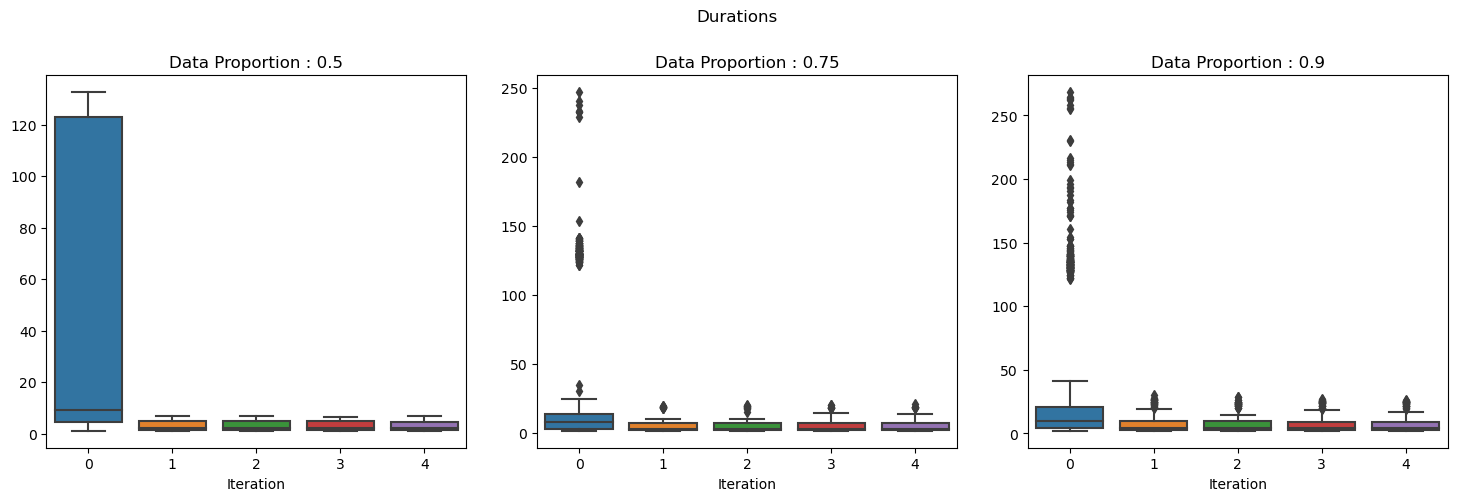

In [33]:

all_sizes = [0.5, 0.75, 0.9]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Durations')
fig.tight_layout(pad=2.0)

for i, sizes in enumerate(all_sizes):
    ax = axs[i]
    sns.boxplot(df[(df.train_size==sizes)], x='iteration', y='duration', ax=ax)
    ax.set(title=f'Data Proportion : {sizes}', xlabel='Iteration', ylabel='')

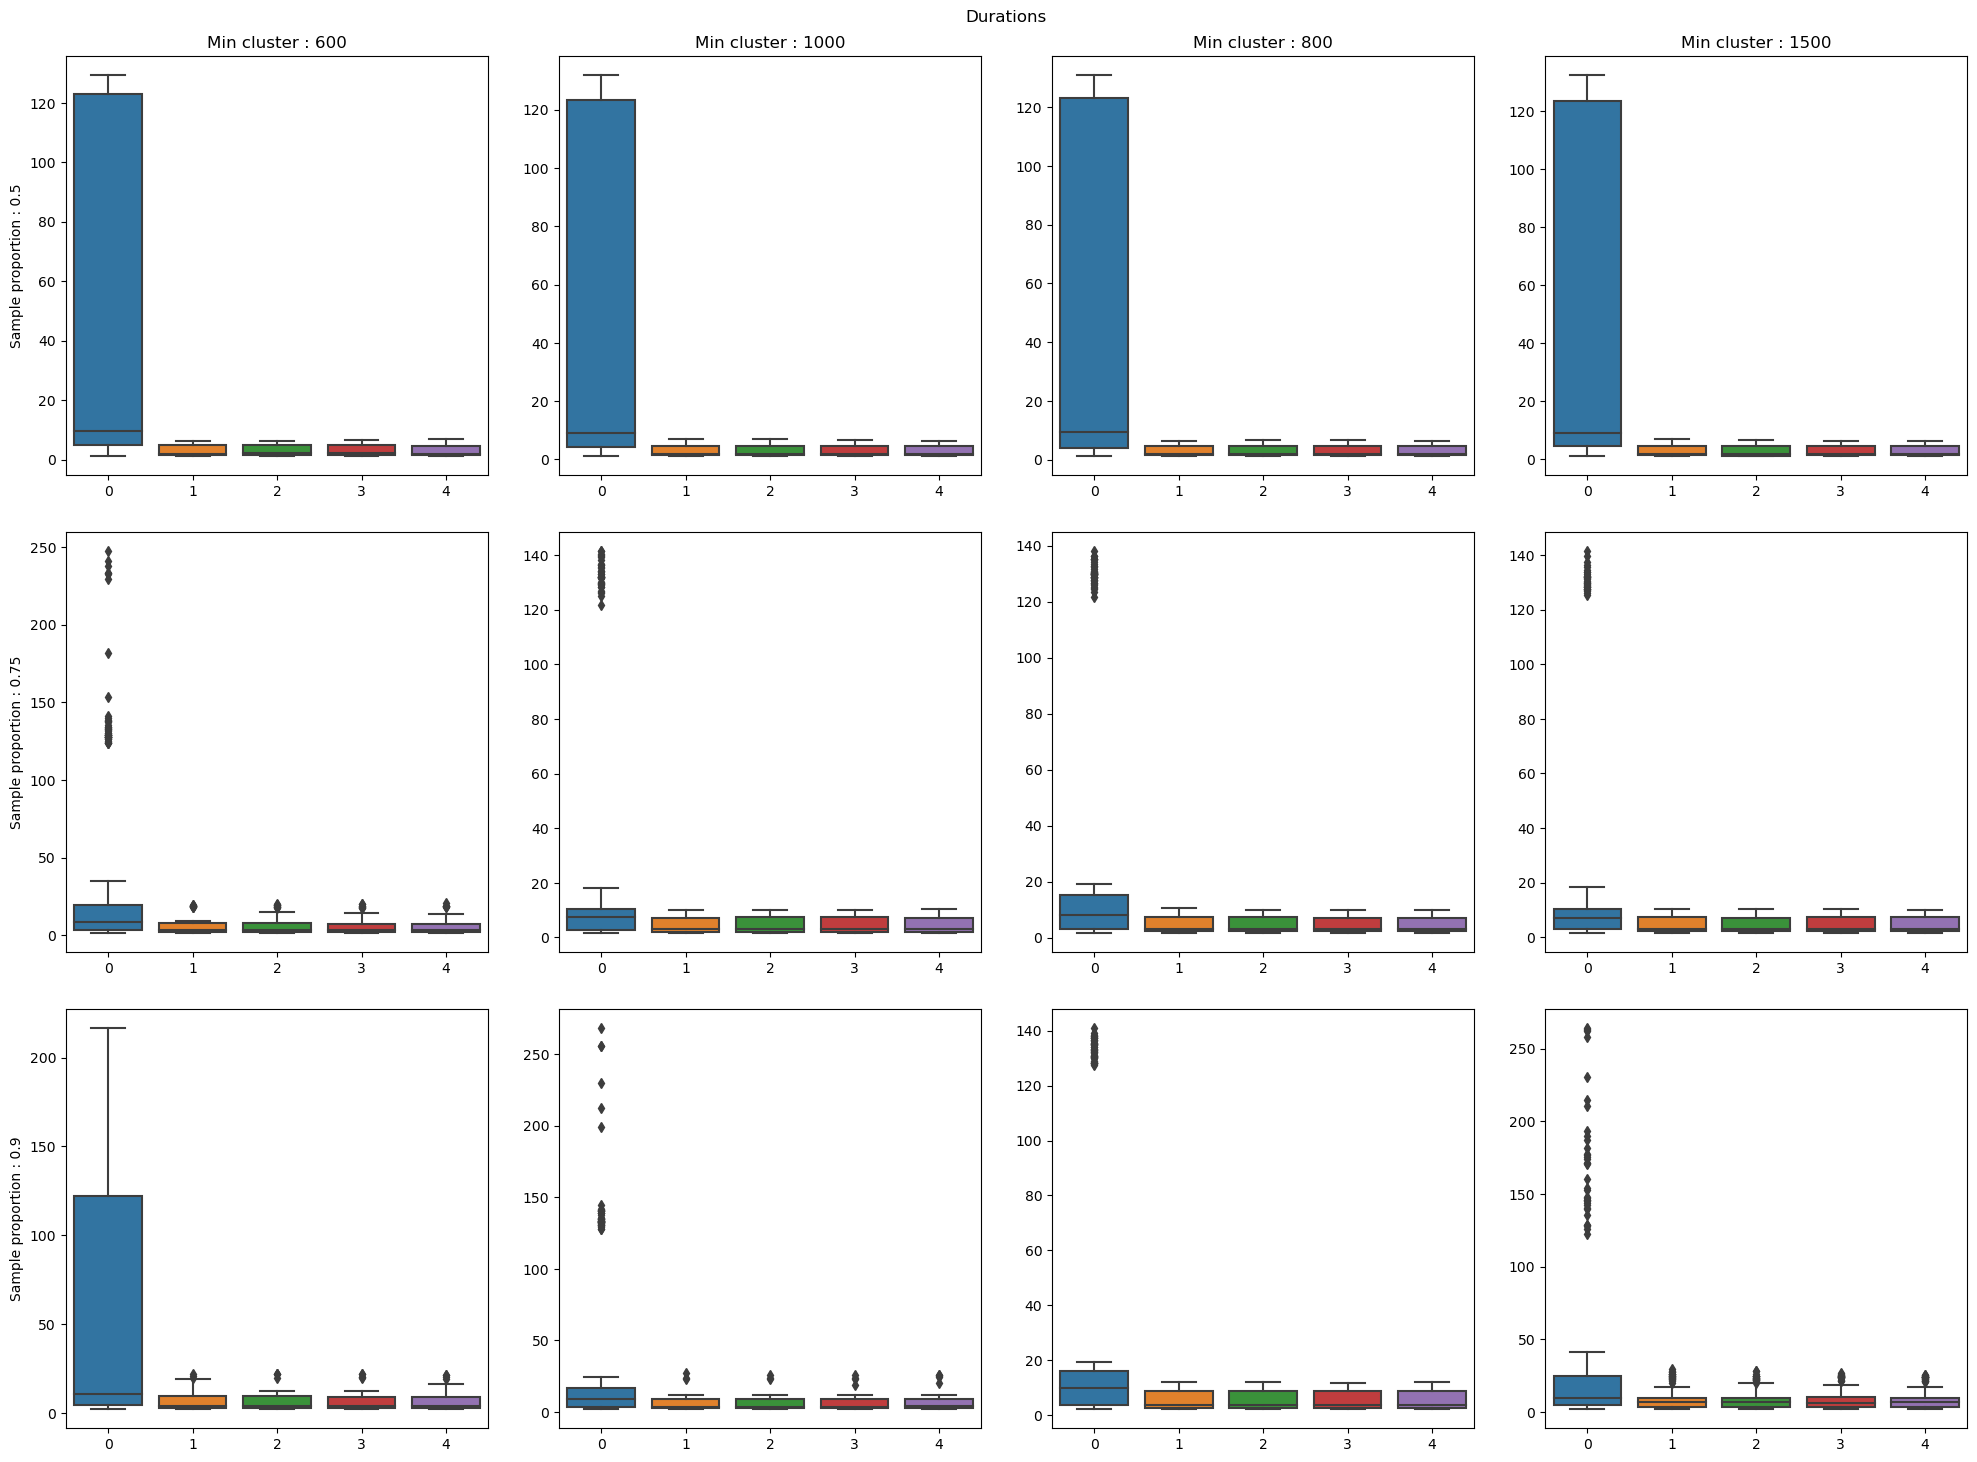

In [34]:
all_sizes = [0.5, 0.75, 0.9]
all_iters = [0, 1, 2, 3]
all_min_cl = list(set(df.min_cluster_size))
nr = len(all_sizes)
nc = len(all_min_cl)

fig, axs = plt.subplots(nr, nc, figsize=(5*nc, 5*nr))
fig.suptitle('Durations')
fig.tight_layout(pad=2.0)

for i, sizes in enumerate(all_sizes):
    for j, mcs in enumerate(all_min_cl):
        ax = axs[i, j]
        sns.boxplot(df[(df.train_size==sizes)&(df.min_cluster_size==mcs)], x='iteration', y='duration', ax=ax)
        if(i==0):
            ax.set(title=f'Min cluster : {mcs}', xlabel='', ylabel='')
        if(j==0):
            ax.set(title='', ylabel=f'Sample proportion : {sizes}', xlabel='')
        if(i==0 and j==0):
            ax.set(title=f'Min cluster : {mcs}', xlabel='', ylabel=f'Sample proportion : {sizes}')
        if(i>0 and j>0):
            ax.set(title='', ylabel='', xlabel='')

# Single parameter setting: test stability

In [6]:
df1 = pd.read_csv('ParameterResults/HyperParameterSearch_standardParams_shuffleSplit_train_size0.9_.csv')
df1['Sample Type'] = 'Suffle split'

df2 = pd.read_csv('ParameterResults/HyperParameterSearch_standardParams_train_size0.9.csv')
df2['Sample Type'] = 'Stratified'

<Axes: xlabel='adj_rand_no_noise', ylabel='Density'>

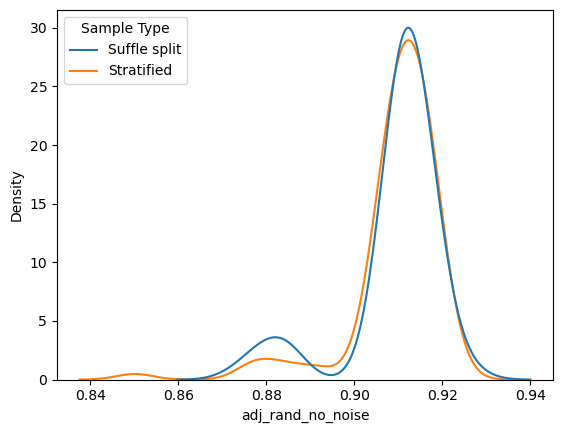

In [36]:
df_sampling = pd.concat([df1, df2])
sns.kdeplot(df_sampling, x='adj_rand_no_noise', hue='Sample Type' )

In [37]:
df_sampling[['adj_rand_no_noise', 'proportion_of_noise', 'number_of_clusters']]

,adj_rand_no_noise,proportion_of_noise,number_of_clusters
0,0.911997,0.025381,11
1,0.911061,0.025762,11
2,0.913704,0.025873,11
3,0.909729,0.026889,11
4,0.919423,0.026714,11
...,...,...,...
95,0.918177,0.026778,11
96,0.911599,0.025841,11
97,0.918756,0.025921,11
98,0.918333,0.025651,11


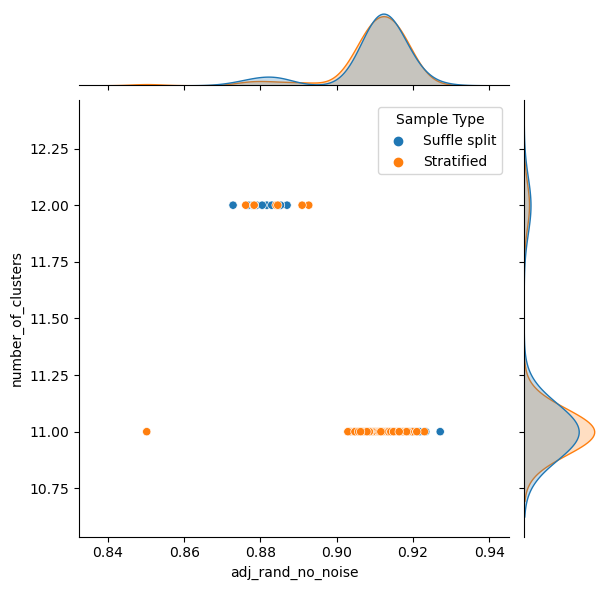

In [43]:
sns.jointplot(df_sampling, x='adj_rand_no_noise', y='number_of_clusters', hue='Sample Type')

In [49]:
df_sampling.iloc[0]

k                                  1
label_prior                      0.9
max_iter                          50
max_total_weight                64.0
min_cluster_size                 800
min_prob                      0.0001
model_prior_strength             0.0
n_iter                             3
n_neighbors                       30
noise_prior                      0.1
tolerance                    0.00001
iteration                          0
train_size                       0.9
duration                  179.222596
adj_rand                    0.883203
adj_rand_no_noise           0.911997
number_of_clusters                11
proportion_of_noise         0.025381
Sample Type             Suffle split
Name: 0, dtype: object